In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [3]:
def calculate_cpm(x):
    Total_Spend = df.Spend
    Number_Impressions = df.Impressions
    cpm = (Total_Spend/Number_Impressions)*1000
    return cpm

In [4]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))

In [5]:
def calculate_cpc(x):
    Total_Spend = df.Spend
    Number_Clicks = df.Clicks
    cpc = (Total_Spend/Number_Clicks)
    return cpc
df["CPC"] = df[["CPC"]].apply(lambda x : calculate_cpc(x))

In [6]:
def calculate_ctr(x):
    Number_Clicks = df.Clicks
    Ad_Impressions = df.Impressions
    ctr = (Number_Clicks/Ad_Impressions)*100
    return ctr
df["CTR"] = df[["CTR"]].apply(lambda x : calculate_ctr(x))

In [7]:
df2=df.copy()

In [8]:
df2.drop(["Timestamp","InventoryType","Ad Type","Platform","Device Type","Format"], axis = 1, inplace = True)

In [9]:
def remove_outlier(col):
    
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [10]:
column_names = ['Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions',
                'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

In [11]:
for col_name in column_names:
    lr, ur = remove_outlier(df2[col_name])
    print("For column", col_name)
    print("Lower range:", lr, "and upper range:", ur)

    df2[col_name] = np.where(df2[col_name] > ur, ur, df2[col_name])
    df2[col_name] = np.where(df2[col_name] < lr, lr, df2[col_name])

For column Ad Size
Lower range: 54000.0 and upper range: 102000.0
For column Available_Impressions
Lower range: -3707387.0 and upper range: 6268771.0
For column Matched_Queries
Lower range: -1725343.75 and upper range: 2924326.25
For column Impressions
Lower range: -1648666.5 and upper range: 2769085.5
For column Clicks
Lower range: -17415.625 and upper range: 30919.375
For column Spend
Lower range: -4469.15 and upper range: 7675.73
For column Fee
Lower range: 0.30000000000000004 and upper range: 0.3799999999999999
For column Revenue
Lower range: -2998.5937874999995 and upper range: 5145.297312499999
For column CTR
Lower range: -19.543087778859437 and upper range: 33.27876617457427
For column CPM
Lower range: -15.19031633320633 and upper range: 29.981418178163874
For column CPC
Lower range: -0.5950238218287072 and upper range: 1.2310015773280991


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
df_scaled=pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

df_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


In [16]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    sse[k] = kmeans.inertia_

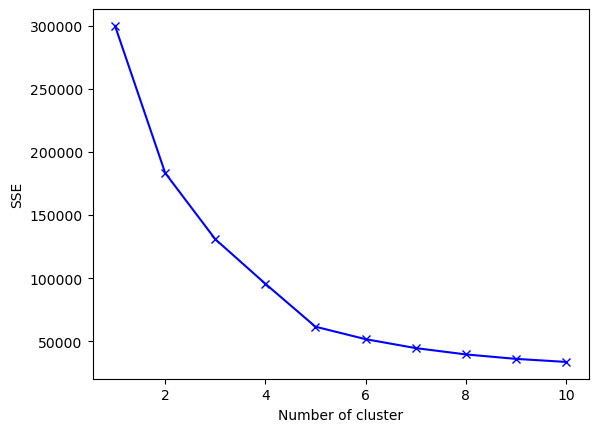

In [17]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [20]:
sc = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    sc[k] = silhouette_score(df_scaled, labels)0

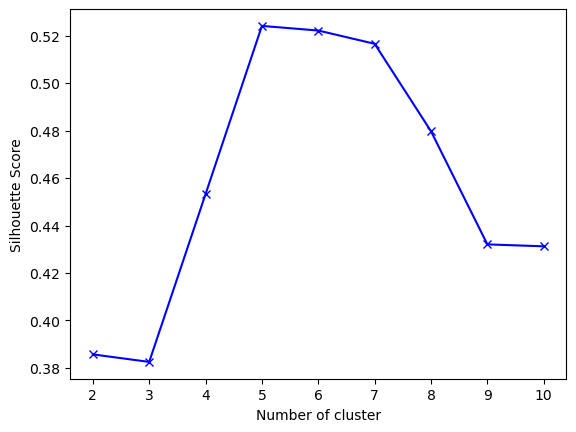

In [21]:
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()